# Mobile price classification with multilayer perceptron
## Tensorflow
Erik Matovič and Jakub Horvat

[Dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv)

Predict a price range indicating how high the price is

### 0. Imports

In [2]:
from utils import split_train_val
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
from sklearn.model_selection import train_test_split
from utils import check_null_values, print_sum_null, rescale, split_data
import numpy as np

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices('GPU'))


2.11.0
Num GPUs Available:  0
tf.Tensor(1276.0834, shape=(), dtype=float32)
[]


In [4]:
wandb.login()
run=wandb.init(project="nsiete1")

wandb: Currently logged in as: jakub-horvat56 (testsd). Use `wandb login --relogin` to force relogin


### 1. Data Preprocessing

Based on [exploratory data analysis](EDA.ipynb) test set does not have target variable price_range. We split our dataset into train-dev-test.

In [5]:
# read datasets
df_train = pd.read_csv('../data/train.csv', sep=',')
df_test = df_train[-200:]
df_train = df_train[:-200]
print(df_train.shape,df_test.shape)


(1800, 21) (200, 21)


In [6]:
x_train = df_train.values[:, :-1]       #vsetko okrem price range
x_train = x_train.astype('float32')     # input data as floats
#x_train
y_train = df_train.values[:, -1]  # price range
y_train = y_train.astype('int')
print(y_train)

[1 2 2 ... 0 1 2]


In [7]:
x_test = df_test.values[:, :-1]       #vsetko okrem price range
x_test = x_test.astype('float32')     # input data as floats
#x_test
y_test = df_test.values[:, -1]  # price range
y_test = y_test.astype('int')
print(y_test)

[0 1 3 3 1 2 1 0 0 1 0 1 0 0 1 3 3 1 0 2 0 3 1 2 2 1 2 3 3 0 0 1 2 2 2 1 2
 1 0 2 3 0 0 3 0 3 0 0 3 3 0 3 0 0 0 0 3 3 2 0 0 0 0 3 0 2 3 2 3 3 2 3 1 0
 2 0 0 1 1 1 2 2 0 0 3 0 1 2 0 3 1 0 0 3 0 1 0 3 3 0 1 2 2 2 3 0 1 3 3 1 3
 0 1 0 0 2 1 0 2 0 3 1 0 2 1 2 1 3 0 2 3 1 1 1 2 1 3 2 2 2 2 3 1 0 0 0 0 2
 1 2 1 0 1 3 0 3 0 3 3 1 2 0 2 1 1 0 2 1 0 2 2 1 0 3 1 3 0 2 1 1 1 1 2 2 1
 3 1 0 1 1 0 3 0 3 3 0 2 3 0 3]


In [8]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1) #,random_state=52
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)
class_labels = [0, 1, 2, 3]
y_cat_train = tf.keras.utils.to_categorical(y_train, num_classes=len(class_labels))
y_cat_val = tf.keras.utils.to_categorical(y_val, num_classes=len(class_labels))
y_cat_test = tf.keras.utils.to_categorical(y_test, num_classes=len(class_labels))
print(y_cat_train)

(1620, 20) (180, 20) (1620,) (180,)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [9]:
#Define Layers and Dropout of MLP
hidden_size = 256
model = keras.Sequential([
    keras.layers.Dense(hidden_size,input_shape=(20,),activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(hidden_size,activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(hidden_size,activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(hidden_size,activation='relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(4,activation='sigmoid') #activation='sigmoid'
])


In [10]:
#best learning rate
lr = 0.03648030109469176
#definition of optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
#configuration of model for training
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy','mse']
              )

In [11]:
#model training
history = model.fit(x_train,
                    y_cat_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(x_val,y_cat_val),
                    callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ],
                    verbose=0)

INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.1s


INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 0.0s


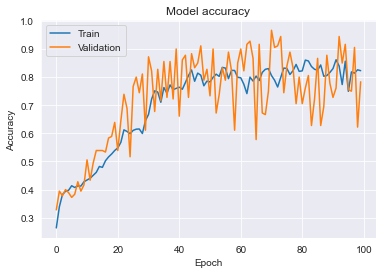

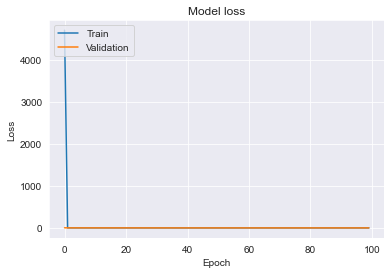

In [12]:
import matplotlib.pyplot as plt

#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
#prediction for test data
score=model.evaluate(x_test,y_cat_test)
predict = model.predict(x_test)
predict

7/7 [==============================] - 0s 3ms/step


array([[9.99948323e-01, 9.96326029e-01, 8.14803660e-01, 3.10699493e-02],
       [1.88544929e-01, 9.95631933e-01, 9.24546421e-01, 4.95216809e-02],
       [2.76555721e-08, 6.89857125e-01, 9.99861300e-01, 9.99695182e-01],
       [4.52457682e-10, 3.55030119e-01, 9.99975502e-01, 9.99994278e-01],
       [9.99053657e-01, 9.98063803e-01, 6.80152774e-01, 1.67139322e-02],
       [6.14674902e-03, 9.89667416e-01, 9.79302466e-01, 2.45739341e-01],
       [9.98385966e-01, 9.97827232e-01, 6.99226201e-01, 1.63598824e-02],
       [9.99900877e-01, 9.96854842e-01, 7.81572104e-01, 2.62215491e-02],
       [9.99948323e-01, 9.96326029e-01, 8.14803660e-01, 3.10699493e-02],
       [8.70962501e-01, 9.96502697e-01, 8.42723727e-01, 2.27749739e-02],
       [9.99948323e-01, 9.96326029e-01, 8.14803660e-01, 3.10699493e-02],
       [4.80388850e-01, 9.96116519e-01, 8.94238591e-01, 3.34250219e-02],
       [9.99948323e-01, 9.96326029e-01, 8.14803660e-01, 3.10699493e-02],
       [9.99948323e-01, 9.96326029e-01, 8.14803660e

In [14]:
predicted_test = []
for row in predict:
    a = max(row)
    b=np.where(row==a)[0][0]
    predicted_test.append(b)

[0, 1, 2, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1, 0, 3, 1, 1, 2, 1, 2, 3, 3, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 3, 0, 2, 2, 2, 3, 3, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 3, 0, 1, 2, 0, 3, 1, 0, 0, 2, 0, 1, 0, 3, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 3, 1, 0, 2, 1, 1, 0, 2, 0, 2, 3, 1, 0, 1, 2, 1, 3, 2, 1, 2, 2, 3, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 3, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 0, 3, 1, 3, 0, 2, 1, 1, 1, 0, 2, 2, 1, 3, 1, 0, 1, 1, 0, 3, 0, 3, 3, 0, 2, 3, 0, 2]


{'0': {'precision': 0.863013698630137, 'recall': 1.0, 'f1-score': 0.9264705882352942, 'support': 63}, '1': {'precision': 0.8125, 'recall': 0.7959183673469388, 'f1-score': 0.8041237113402061, 'support': 49}, '2': {'precision': 0.6346153846153846, 'recall': 0.7857142857142857, 'f1-score': 0.7021276595744681, 'support': 42}, '3': {'precision': 1.0, 'recall': 0.5869565217391305, 'f1-score': 0.7397260273972603, 'support': 46}, 'accuracy': 0.81, 'macro avg': {'precision': 0.8275322708113804, 'recall': 0.7921472937000887, 'f1-score': 0.7931119966368072, 'support': 200}, 'weighted avg': {'precision': 0.8341810458377239, 'recall': 0.81, 'f1-score': 0.8064323393844763, 'support': 200}}


<Figure size 1850x1050 with 0 Axes>

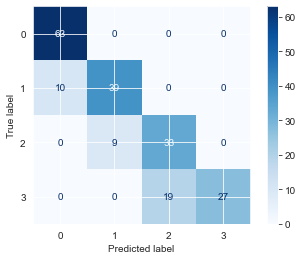

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
report = classification_report(y_test, predicted_test, target_names=['0', '1', '2', '3'], output_dict=True)
f = plt.figure(figsize=(10,6)) #plotting
f.set_size_inches(18.5, 10.5)
f.set_dpi(100)
print(report)

matrix = confusion_matrix(y_test, predicted_test)
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=['0', '1', '2', '3'])
matrix_display.plot(cmap='Blues')

In [16]:
report

{'0': {'precision': 0.863013698630137,
  'recall': 1.0,
  'f1-score': 0.9264705882352942,
  'support': 63},
 '1': {'precision': 0.8125,
  'recall': 0.7959183673469388,
  'f1-score': 0.8041237113402061,
  'support': 49},
 '2': {'precision': 0.6346153846153846,
  'recall': 0.7857142857142857,
  'f1-score': 0.7021276595744681,
  'support': 42},
 '3': {'precision': 1.0,
  'recall': 0.5869565217391305,
  'f1-score': 0.7397260273972603,
  'support': 46},
 'accuracy': 0.81,
 'macro avg': {'precision': 0.8275322708113804,
  'recall': 0.7921472937000887,
  'f1-score': 0.7931119966368072,
  'support': 200},
 'weighted avg': {'precision': 0.8341810458377239,
  'recall': 0.81,
  'f1-score': 0.8064323393844763,
  'support': 200}}

In [15]:
wandb.finish()


wandb: ERROR Control-C detected -- Run data was not synced
